<a href="https://colab.research.google.com/github/Christybmoncy/Heart-Disease-Prediction/blob/main/heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the dependencies ie the libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


Data collection and processing

In [ ]:
# loading the csv data to pandas dataframe
heart_data= pd.read_csv('/content/heart_disease_data.csv')

In [ ]:
#print first 5rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#print last 5rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
#number of rows and columns
heart_data.shape

(303, 14)

In [ ]:
#getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#checking for missing values
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
#statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#checking the distribution of target values
heart_data['target'].value_counts()

,count
target,
1,165
0,138


1---defective heart
0---healthy heart

splitting the features and target

In [ ]:
X = heart_data.drop(columns='target',axis=1)
Y = heart_data['target']

In [ ]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


splitting the training data and test data

In [ ]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(303, 13) (242, 13) (61, 13)


model training

logistics regression

In [ ]:
model = LogisticRegression()

In [ ]:
#training the logistics regression model
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

model evaluation

accuracy score

In [ ]:
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [ ]:
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.8512396694214877


building a predictive system

Confusion Matrix:
[[23  5]
 [ 6 27]]


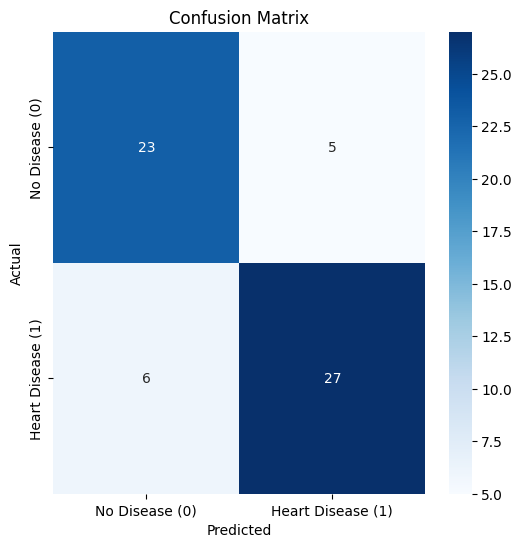


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.84      0.82      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have X_test and y_test (test data) and the model is trained
y_pred = model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Create a heatmap for better visualization
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease (0)', 'Heart Disease (1)'], yticklabels=['No Disease (0)', 'Heart Disease (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# You can also print the classification report to get precision, recall, f1-score, and accuracy
print("\nClassification Report:")
print(classification_report(Y_test, y_pred))


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train = scaler.fit_transform(X_train)

# Transform the test data
X_test = scaler.transform(X_test)
# Input data for a person
input_data = (50, 1, 2, 138, 220, 0, 1, 155, 0, 2.0, 1, 0, 2)

# Convert input data to a DataFrame with proper column names
input_data_df = pd.DataFrame([input_data], columns=X.columns)

# Scale the input data
input_data_scaled = scaler.transform(input_data_df)

# Make prediction
prediction = model.predict(input_data_scaled)
probability = model.predict_proba(input_data_scaled)[:, 1][0]  # Probability of heart disease

# Output the result
if prediction[0] == 0:
    print(f'Person does not have heart disease. (Probability: {probability:.2f})')
else:
    print(f'Person has heart disease. (Probability: {probability:.2f})')

Person has heart disease. (Probability: 0.85)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


45	1	2	130	240	0	1	175	0	1.0	1	0	2---no heart disease
60	0	3	145	250	1	1	140	1	2.3	0	2	3	--heart disease

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ROC-AUC: 0.85


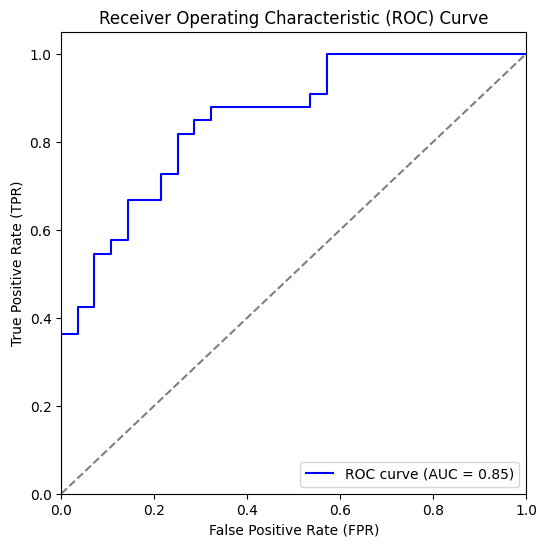

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for the test set
probabilities = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (heart disease)

# Calculate ROC-AUC
roc_auc = roc_auc_score(Y_test, probabilities)
print(f'ROC-AUC: {roc_auc:.2f}')

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, probabilities)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random model)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Predictions from the model
y_pred = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Extract values
tn, fp, fn, tp = cm.ravel()  # True Negatives, False Positives, False Negatives, True Positives

# Bar graph data
categories = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
values = [tn, fp, fn, tp]

# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['blue', 'red', 'orange', 'green'])
plt.title('Confusion Matrix Representation')
plt.ylabel('Count')
plt.xlabel('Categories')

# Annotating the bar graph with counts
for i, v in enumerate(values):
    plt.text(i, v + 0.5, str(v), ha='center', fontweight='bold')

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


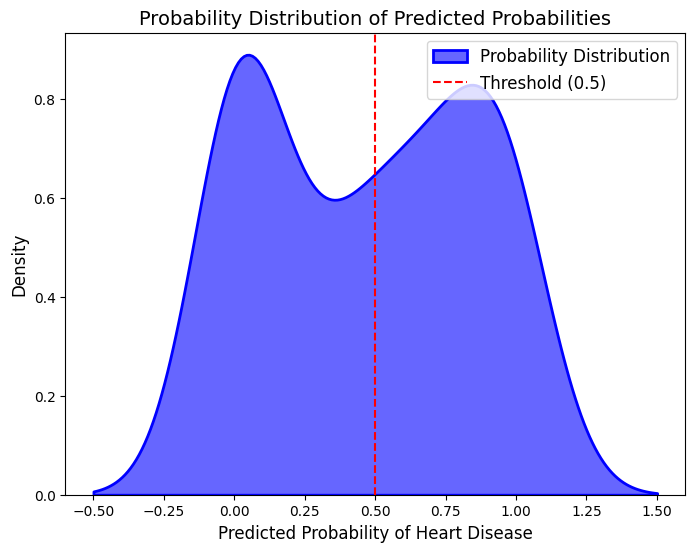

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict probabilities for the test set
probabilities = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (heart disease)

# Plot the probability distribution curve
plt.figure(figsize=(8, 6))
sns.kdeplot(probabilities, fill=True, color='blue', alpha=0.6, linewidth=2, label="Probability Distribution")
plt.title('Probability Distribution of Predicted Probabilities', fontsize=14)
plt.xlabel('Predicted Probability of Heart Disease', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.axvline(0.5, color='red', linestyle='--', label='Threshold (0.5)')  # Add a threshold line
plt.legend(fontsize=12)
plt.show()
